In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings

warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


With an attempt to explain the cause of heart attacks, this notebook explores the major parameters that increases the chances of a heart attack in a human being. Also, the notebook defines a module to detect the chances of a person having a heart attack.
This notebook dwells on these basic questions:
1. Is age and gender really a determining factor for heart diseaes?
2. What are the bodily factors that causes heart diseases.
3. Can we predict the chances of a heart disease in a person? If so, how reliable would it be?

In [2]:
#Importing the data

data = pd.read_csv('../input/heart.csv')

data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
# getting the columns in the dataset

data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [4]:
#exploring the data statistically

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


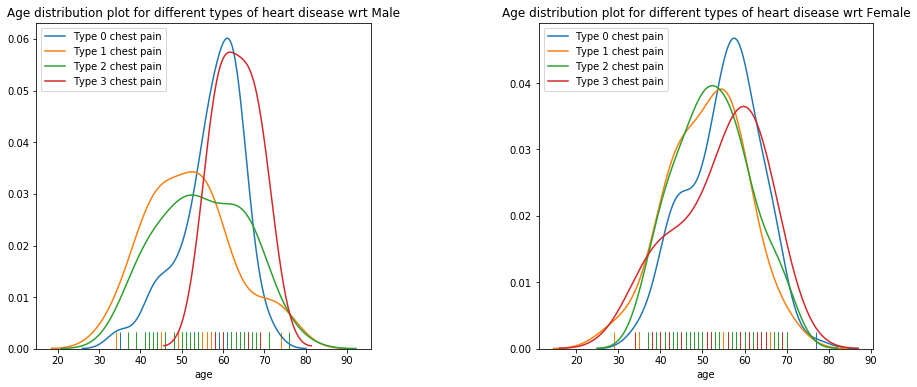

In [5]:
# Understanding the influence of Age on heart diseases, coupled with gender

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1, figsize = (15,6))
n = 0
for gender in [0,1]:
    n = n + 1
    plt.subplot(1,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for c in range(0,4):
        sns.distplot(data['age'][data['cp'] == c][data['sex'] == gender], 
                     hist = False, rug = True, label = 'Type {} chest pain'.format(c))
    plt.title('Age distribution plot for different types of heart disease wrt {}'.
              format('Male' if gender == 0 else 'Female'))
plt.legend()
plt.show()                    

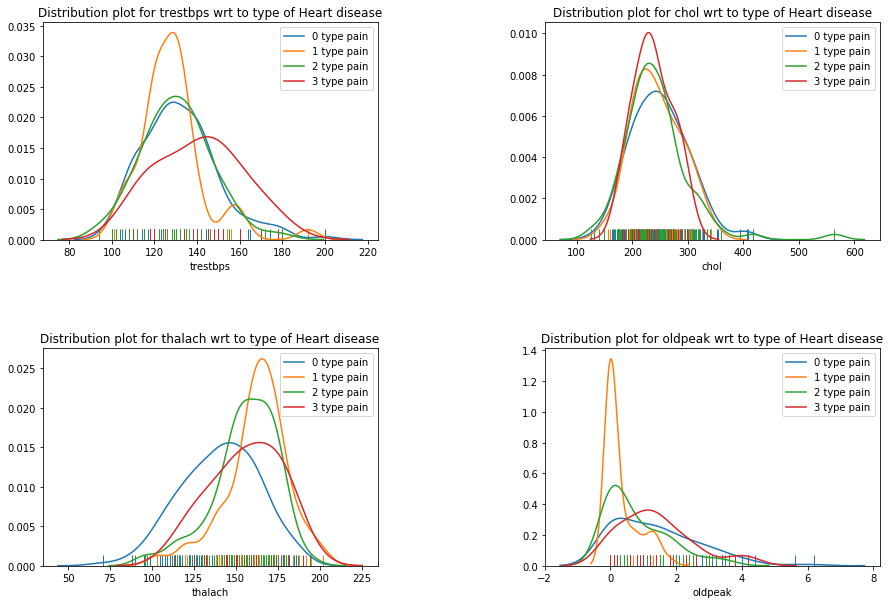

In [6]:
# Visualizing the distribution of parameter values wrt presence of heart disease

param = ['trestbps', 'chol', 'thalach','oldpeak']

plt.figure (1, figsize = (15,10))
n = 0
for p in param:
    n = n + 1
    plt.subplot(2,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for ctype in range(0,4):
            sns.distplot(data[p][data['cp'] == ctype], 
                     hist = False, rug = True, label = "{} type pain".format(ctype))
    plt.title("Distribution plot for {} wrt to type of Heart disease".format(p))
plt.legend()
plt.show() 

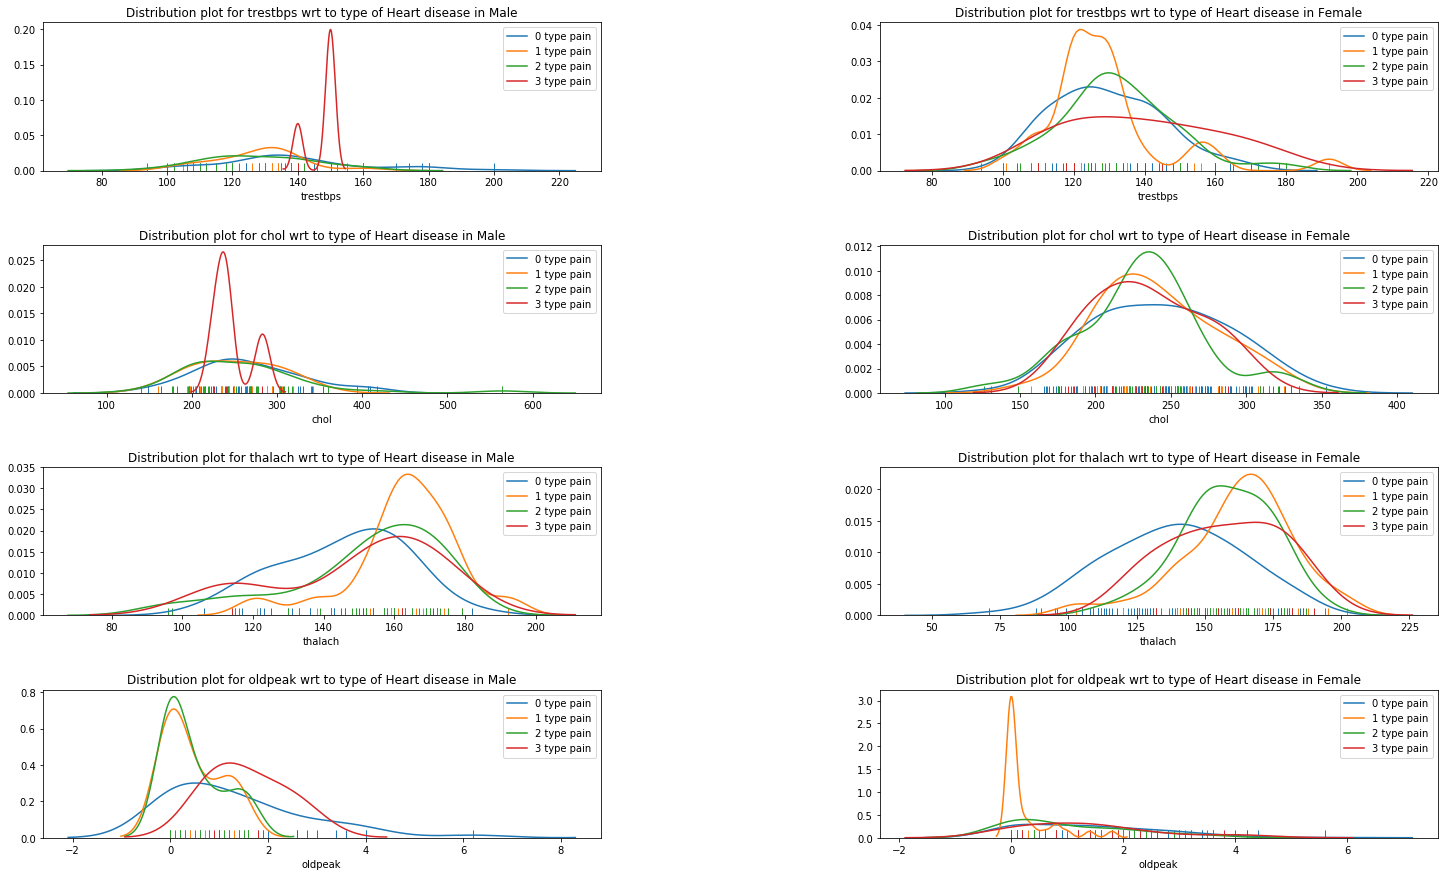

In [7]:
# Determining the influence of gender on heart diseases using the same parameters

param = ['trestbps', 'chol', 'thalach','oldpeak'] 

plt.figure (1, figsize = (25,15))
n = 0
for p in param:
    for gender in [0, 1]:
        n = n + 1
        plt.subplot(4,2, n)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        for ctype in range(0,4):
            sns.distplot(data[p][data['cp'] == ctype][data['sex'] == gender], 
                     hist = False, rug = True, label = "{} type pain".format(ctype))
        plt.title("Distribution plot for {} wrt to type of Heart disease in {}".
                  format(p, 'Male' if gender == 0 else 'Female'))
plt.legend()
plt.show()

From the above visualizations, the following basic inferences can be drawn:
1. Chest pain can be caused by all of the 4 parameters mentioned above, having more or less influence of the type of chest pains
2. A visibly large proportion of **Men** having **trestbps** value between 140-160 and **chol** value between 200-300 suffers from type-3 chest pain. Similarly, a visibly large proportion of **Women** having **oldpeak** value less than 1 experiences from type-1 chest pain.
3. The distributions graphs show vastly different reasult for male and female, meaning that **GENDER** have a profound impact on the cause of heart diseases. Also, the **chances and the types of chest pains** experienced by patients also differ vastly across the two genders.
4. Age also plays an important role in determining the *type* of disease.
5. A large propotion of **Men** of age 40-60 suffers mostly from type-3 heart disease, but, a similar proportion of men of the same age group have no heart disases at all. 
6. **Women** mostly don't suffer from any heart diseaes, however, some experience type-2 and type-1 heart diseases at the age of 40-60. Also, type-3 heart diseases are experienced by females in some proportions after the age of 60.
7. Any discussion about heart diseases and it's causes, without considering **gender** as a factor is erroneous. 

<Figure size 1080x432 with 0 Axes>

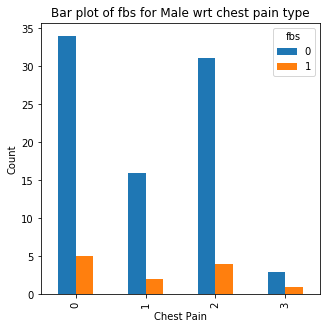

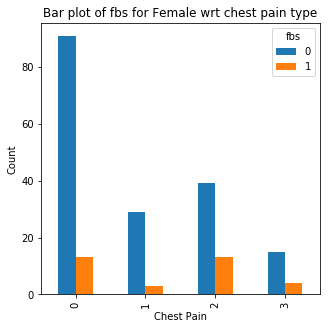

In [8]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    #n = n + 1 
    #plt.subplot(1,2, n)
    #plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[0]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[0], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

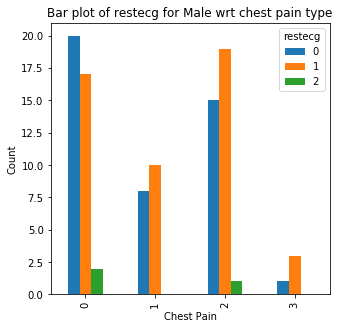

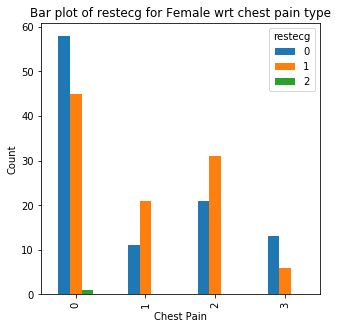

In [9]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[1]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[1], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

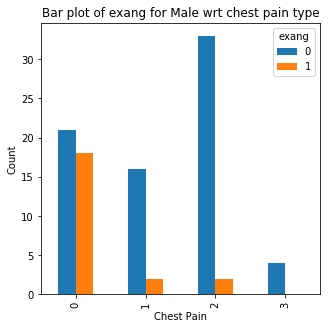

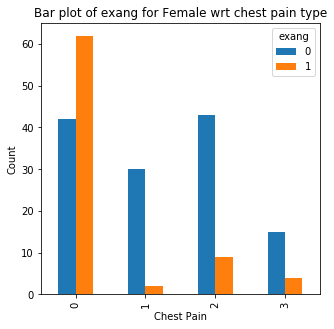

In [10]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[2]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[2], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

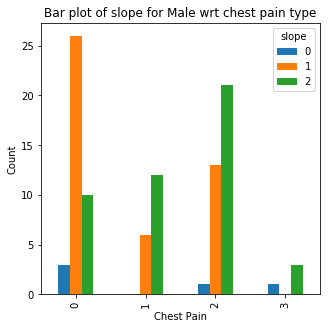

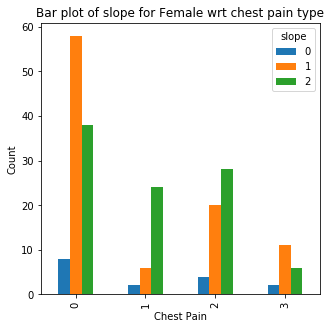

In [11]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[3]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[3], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

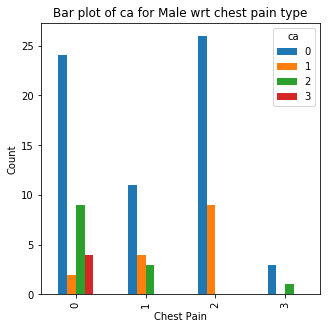

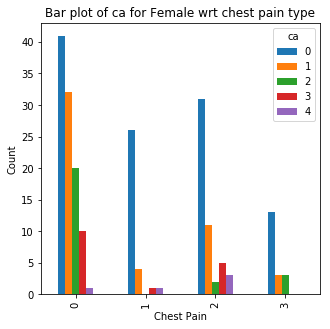

In [12]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[4]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[4], 'Male' if gender == 0 else 'Female'))

<Figure size 1080x432 with 0 Axes>

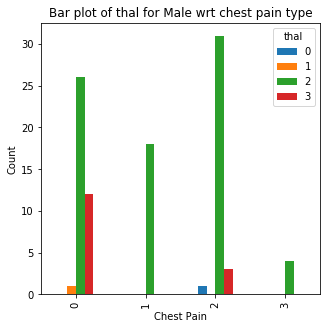

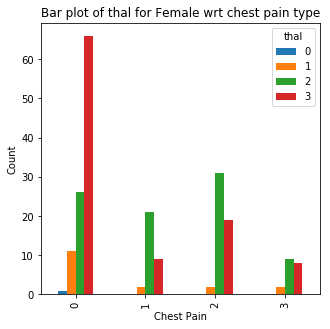

In [13]:
# Visualizing the count plots of the different categorical variables wrt of gender and chest pain type
param = ['fbs', 'restecg','exang', 'slope', 'ca', 'thal']

plt.figure(1, figsize = (15,6))
n = 0
#for p in param:
#for cp in range(0,4):
    
for gender in [0, 1]:
    n = n + 1
    pd.crosstab(data['cp'][data['sex'] == gender],
                data[param[5]][data['sex'] == gender]).plot(kind="bar", figsize = (5,5))
    plt.xlabel('Chest Pain')
    plt.ylabel('Count')
    plt.title('Bar plot of {} for {} wrt chest pain type'.format(param[5], 'Male' if gender == 0 else 'Female'))

A lot of visualizations have been created above, all of which have their own set of information to tell:

1. fbs = 0 value is equally indicative of **no heart disease or type-2 heart disease** in *MALE*, but in *FEMALE*, the same is indicative of **no heart diseases* at all
2. restecg = 1 value is indicative of **no heart disease or type-2 heart disease** in *MALE*, but in *FEMALE*, the same is more indicative of **no heart diseases**. The same goes for restecg = 0
3. exang = 0 is highly indicative of **type-2 heart disease** in *MALE*, whereas exang = 1 is indicative of **no heart disease** in *FEMALE*
4. slope = 1 is highly indicative of **no heart disease** in both *MALE* and *FEMALE*, whereas slope= 2 is indicative of **type- 2 heart disease** in *MALE* and **no heart disease** in *FEMALE*
5. ca = 0 is equally indicative of **type-2 heart disease** or **no heart disease** in *MALE* 
6. thal = 2 is indicative of **type-2 heart disease** and somewhat indicative of **no heart disease** in *MALE*, but in *FEMALE* thal = 3 is highly indicative of **no heart disease** 


**HOW SICK IS OUR WORKING POPULATION???**
*Is the experienced working population having worrysome problems with their heart? LEt's find out*
The average US person retires at the age 60-62. We will consider that the people of the age range 36-55 consitute the most productive people, because they are *the perfect blend of experience and productivity*, henceforth mentioned as *"asset populaiton"*. But, what is the health condition of these *assets population* ? Are their heart healthy? If not, what causes this unhealthiness? The answer to these questions is essential. Let's find out.

Let us now look into the major kinds of heart disases and their casuses that affect the asset population. We would analyse the heart disease of middle aged people ( 36 < age < 55 )

In [14]:
_middleAge = data [data['age'] <=55][data['age'] >35]
print(
    "There are {} no of entries that belong to the asset population, out of {} total entries".
    format(_middleAge.shape, data.shape))
_middleAge.head()

There are (145, 14) no of entries that belong to the asset population, out of (303, 14) total entries


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1


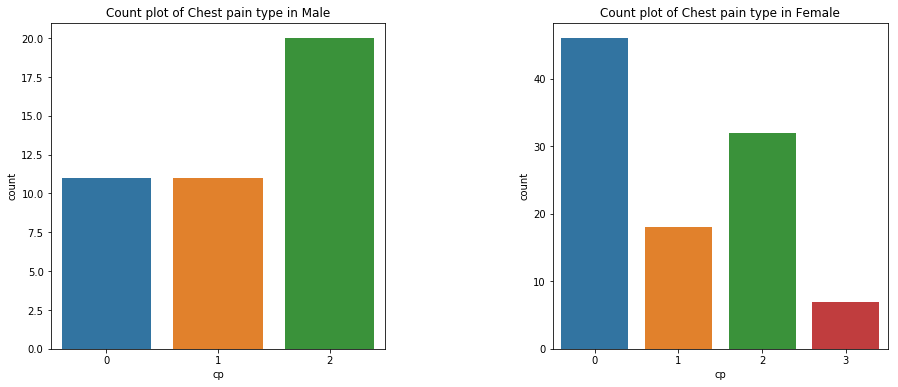

In [15]:
# count plot of the types of heart disease they selected popuation have, wrt gender

plt.figure(1, figsize = (15,6))
n = 0
for gender in [0,1]:
    n = n + 1
    plt.subplot(1,2, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(x = 'cp', data = _middleAge[_middleAge['sex'] == gender])
    plt.title('Count plot of Chest pain type in {}'.format('Male' if gender == 0 else 'Female'))
plt.show()

The plot shows that most of the asset MALE population suffers from type-2 heart disease, which is alarming. On the other hand, the FEMALE asset population mostly have no heart disease, and yet a considerable portion suffers from type-2 heart disease. However, MALE population doesn't have a single case of type-3 heart disease, yet FEMALES have a little but noticalble propotion of type-3 heart diseases. 

One thing is clear, our *asset population* is quite **sick**, with nearly **50% MALES** and nearly **30% FEMALES** suffering from type-2 heart diseases.

To understand the situation more, we need to know the exact causes which create such heart diseases. For that, we refer to our earlier visualizations. We can consider the following parameters:
1. Certain range of values in [oldpeak < 2, thalach > 150] in MALES and [trestbps, chol, thalach] in FEMALES are known to cause type-2 heart diseases.
2. [fbs = 0, resteccg = {0,1} , exang = 0, slope = 1, ca = 0, thal = 2] in MALES and [restecg = {0,1} exang = 0, slope={0,1}, ca = 0, thal = 2 ] in FEMALEs might be considered the parameters for causing type - 2 heart diseaes. 

We can use these paramters to train a classification algorithm to detect the chances of a chest pain in a member of the asset population.

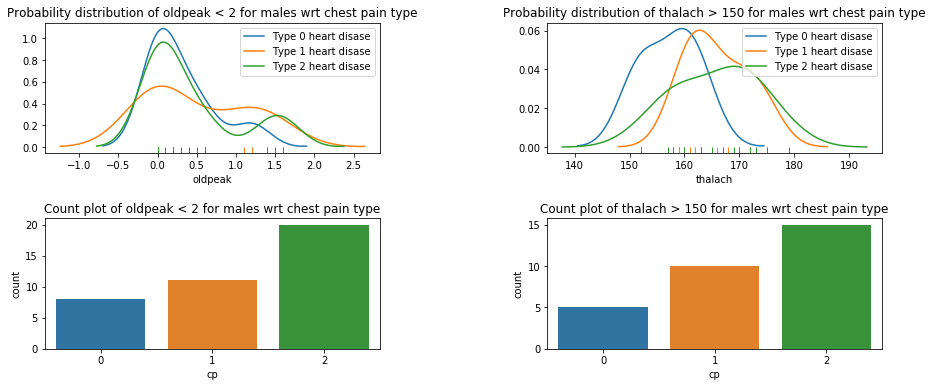

In [16]:
# Visualizing the effect of having oldpeak < 2 and thalach > 150
param = ['oldpeak', 'thalach']

_middleAge_men = _middleAge[_middleAge['sex'] == 0]

plt.figure (1, figsize = (15,6))

plt.subplot( 2, 2, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for cp in range(0,4):
    sns.distplot(_middleAge_men['oldpeak'][_middleAge_men['oldpeak'] < 2]
                 [_middleAge_men['cp'] == cp], hist = False, rug = True,
                label = "Type {} heart disase".format(cp))
plt.title("Probability distribution of oldpeak < 2 for males wrt chest pain type")
plt.subplot( 2, 2, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for cp in range(0,4):
    sns.distplot(_middleAge_men['thalach'][_middleAge_men['thalach'] > 150]
                 [_middleAge_men['cp'] == cp], hist = False, rug = True,
                label = "Type {} heart disase".format(cp))
plt.title("Probability distribution of thalach > 150 for males wrt chest pain type")

plt.subplot( 2, 2, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['oldpeak'] < 2]) 
plt.title("Count plot of oldpeak < 2 for males wrt chest pain type")

plt.subplot( 2, 2, 4)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['thalach'] > 150])
plt.title("Count plot of thalach > 150 for males wrt chest pain type")

#plt.subplot( 2, 2, 4)
#plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

plt.show()

Text(0.5, 1.0, 'Count plot of thal = 2 for males wrt chest pain type')

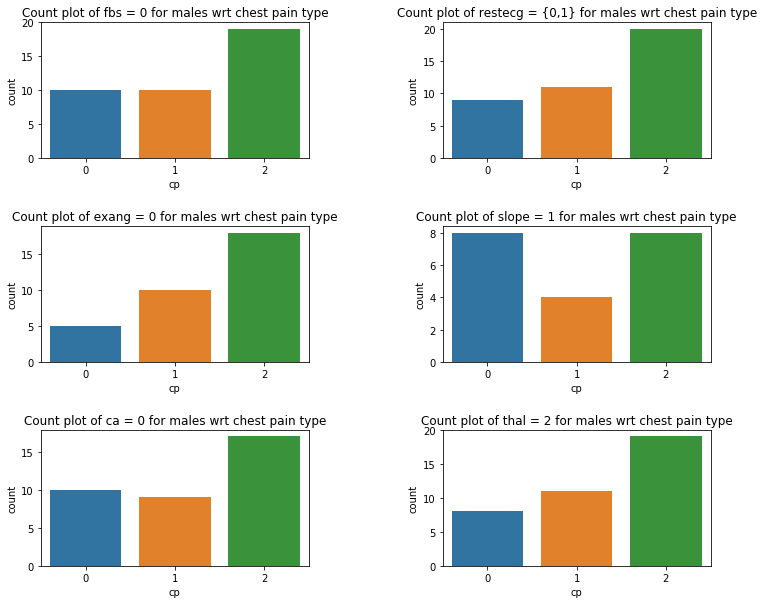

In [17]:
# visualizing [fbs = 0, resteccg = {0,1} , exang = 0, slope = 1, ca = 0, thal = 2] in male
plt.figure (1, figsize = (12,10))

plt.subplot( 3, 2, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['fbs'] == 0])
plt.title("Count plot of fbs = 0 for males wrt chest pain type")


plt.subplot( 3, 2, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['restecg'] <= 1])
plt.title("Count plot of restecg = {0,1} for males wrt chest pain type")


plt.subplot( 3, 2, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['exang'] == 0])
plt.title("Count plot of exang = 0 for males wrt chest pain type")


plt.subplot( 3, 2, 4)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['slope'] == 1])
plt.title("Count plot of slope = 1 for males wrt chest pain type")


plt.subplot( 3, 2, 5)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['ca'] == 0])
plt.title("Count plot of ca = 0 for males wrt chest pain type")


plt.subplot( 3, 2, 6)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_men[_middleAge_men['thal'] == 2])
plt.title("Count plot of thal = 2 for males wrt chest pain type")

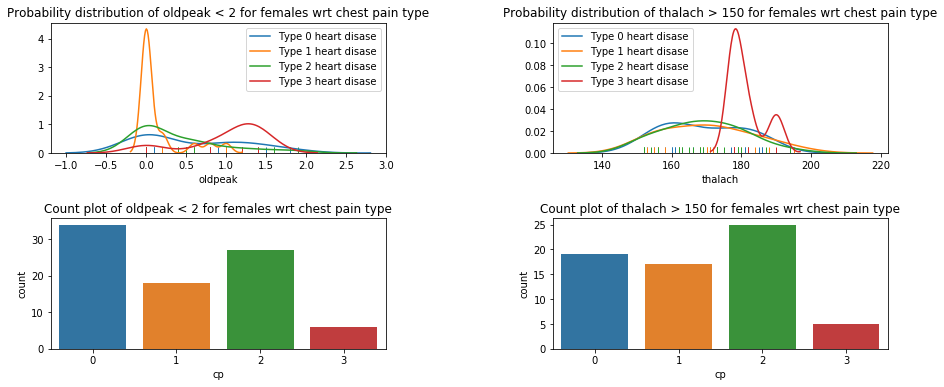

In [20]:
# similar visualizations for females
# Visualizing the effect of having oldpeak < 2 and thalach > 150
param = ['oldpeak', 'thalach']

_middleAge_women = _middleAge[_middleAge['sex'] == 1]

plt.figure (1, figsize = (15,6))

plt.subplot( 2, 2, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for cp in range(0,4):
    sns.distplot(_middleAge_women['oldpeak'][_middleAge_women['oldpeak'] < 2]
                 [_middleAge_women['cp'] == cp], hist = False, rug = True,
                label = "Type {} heart disase".format(cp))
plt.title("Probability distribution of oldpeak < 2 for females wrt chest pain type")
plt.subplot( 2, 2, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

for cp in range(0,4):
    sns.distplot(_middleAge_women['thalach'][_middleAge_women['thalach'] > 150]
                 [_middleAge_women['cp'] == cp], hist = False, rug = True,
                label = "Type {} heart disase".format(cp))
plt.title("Probability distribution of thalach > 150 for females wrt chest pain type")

plt.subplot( 2, 2, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['oldpeak'] < 2]) 
plt.title("Count plot of oldpeak < 2 for females wrt chest pain type")

plt.subplot( 2, 2, 4)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['thalach'] > 150])
plt.title("Count plot of thalach > 150 for females wrt chest pain type")

#plt.subplot( 2, 2, 4)
#plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

plt.show()

Text(0.5, 1.0, 'Count plot of thal = 2 for females wrt chest pain type')

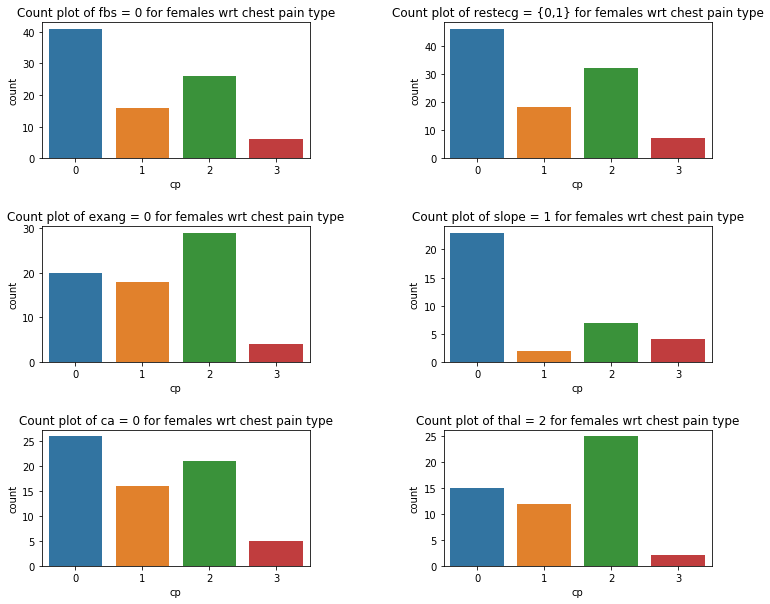

In [21]:
# visualizing [fbs = 0, resteccg = {0,1} , exang = 0, slope = 1, ca = 0, thal = 2] in female
plt.figure (1, figsize = (12,10))

plt.subplot( 3, 2, 1)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['fbs'] == 0])
plt.title("Count plot of fbs = 0 for females wrt chest pain type")


plt.subplot( 3, 2, 2)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['restecg'] <= 1])
plt.title("Count plot of restecg = {0,1} for females wrt chest pain type")


plt.subplot( 3, 2, 3)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['exang'] == 0])
plt.title("Count plot of exang = 0 for females wrt chest pain type")


plt.subplot( 3, 2, 4)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['slope'] == 1])
plt.title("Count plot of slope = 1 for females wrt chest pain type")


plt.subplot( 3, 2, 5)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['ca'] == 0])
plt.title("Count plot of ca = 0 for females wrt chest pain type")


plt.subplot( 3, 2, 6)
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)

sns.countplot(x = 'cp', data = _middleAge_women[_middleAge_women['thal'] == 2])
plt.title("Count plot of thal = 2 for females wrt chest pain type")

The above visualization confirms our assertion of the assumed parametes causing heart diseases among our **asset population** . We, hence create a heatmap and study the co-relation between each of the parameters, for better analysis.

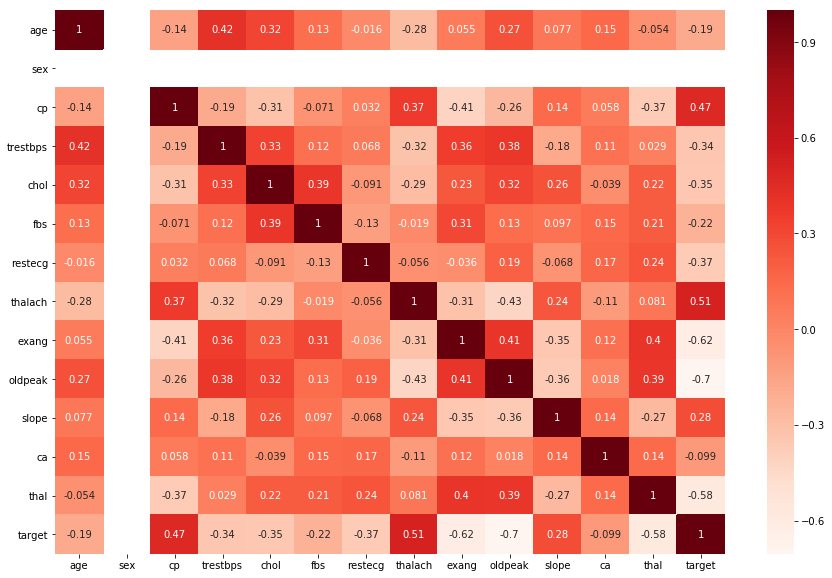

In [18]:
#Generating heat map between the given set of attributes
plt.figure (1, figsize = (15,10))
sns.heatmap(_middleAge_men.corr(), annot = True, cmap = 'Reds')

The above analysis provides us with much needed information regarding the parameters which causes the most common type-2 heart diseases in asset population. We have considered the following parameters (without the constrains):
**FOR MALES**
1. oldpeak, thalach among continuous variables
2. fbs, resteccg, exang, slope, ca, thal among catgorical variables
**FOR FEMALES**
1. trestbps, chol, thalach in continuous variables
2. restecg exang, slope, ca, thal in categorical variables

First, we would create a prediction model to determine if the a person *within the asset population* would suffer from type-2 heart disease or not
We would use the following models, and would tally their accuracy:
1. Decision tree: Random forest
2. Logistic regression.

In [19]:
# creating dummy variables for categorical variables
# we have the following categorical variables : fbs, restecg, exang, ca, thal, slope
_middleAge_men

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2,1
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
40,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2,1
